In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [149]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')
data_combine = pd.concat([data_train,data_test])


In [150]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [151]:
data_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [152]:
# descriptive statistic summary
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# EDA and Feature Engineering 

In [153]:
data_combine.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [154]:
data_train.shape, data_test.shape

((1460, 81), (1459, 80))

In [155]:
data_combine.info() # counting non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [156]:
data_combine.columns = data_combine.columns.str.lower()
data_train.columns = data_train.columns.str.lower()


In [157]:
data_combine.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
mssubclass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
lotfrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
lotarea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
overallqual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
overallcond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
yearbuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
yearremodadd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
masvnrarea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
bsmtfinsf1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


### Correlation Matrix (Heatmap)

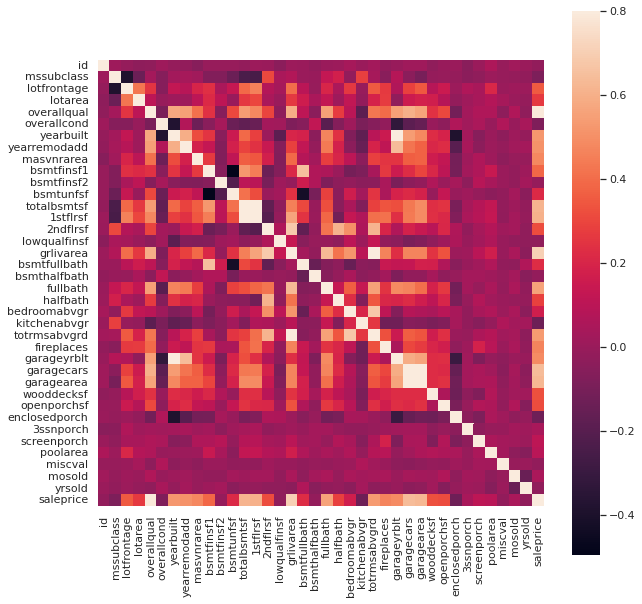

In [158]:
data_train_corr = data_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_train_corr, vmax=.8, square = True)

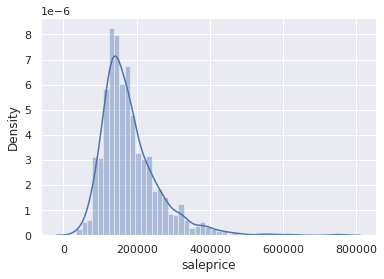

In [159]:
#Histogram of Saleprice
sns.distplot(data_train['saleprice'])

In [160]:
# skewness and kurtosis

print('Skewness: %f' % data_train['saleprice'].skew())
print('kurtosis: %f' % data_train['saleprice'].kurt())


Skewness: 1.882876
kurtosis: 6.536282


#### Relationship with numerical variables

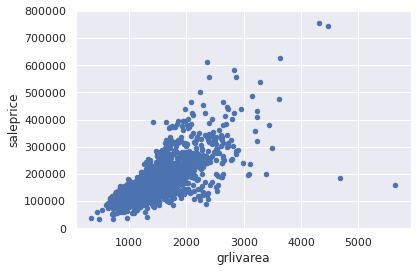

In [161]:
var = 'grlivarea'
data = pd.concat([data_train['saleprice'], data_train[var]], axis =1)
data.plot.scatter(x = var, y = 'saleprice', ylim =(0,800000));

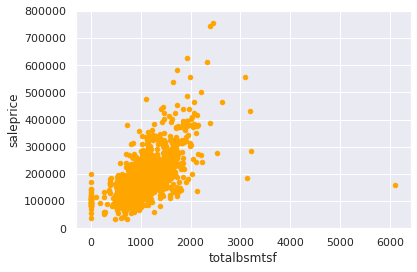

In [162]:
var = 'totalbsmtsf'
data = pd.concat([data_train['saleprice'], data_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'saleprice', ylim = (0,800000), color = 'orange');

#### Relatioship with categorical features


(-0.5, 9.5, 0.0, 800000.0)

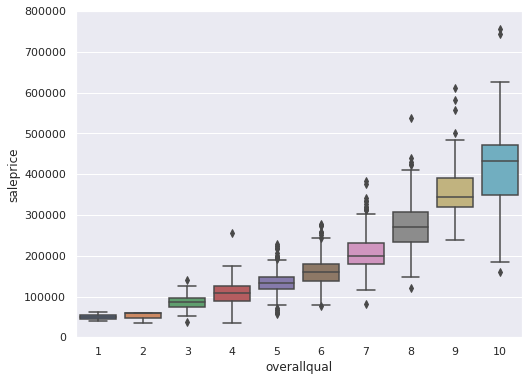

In [163]:
# Box plot overallqual / Salesprice

var = 'overallqual'
data = pd.concat([data_train['saleprice'], data_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = 'saleprice', data = data)
fig.axis(ymin = 0, ymax  = 800000)

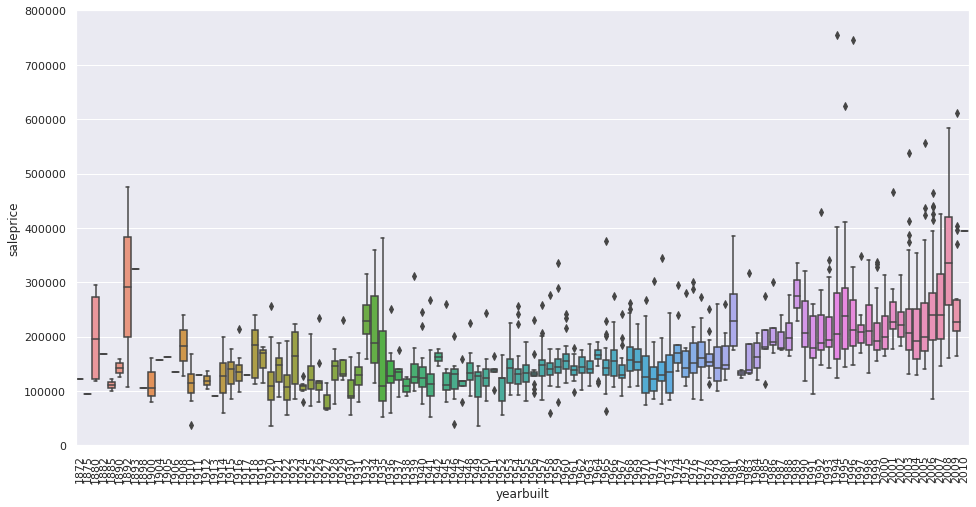

In [164]:
## Box plot year built

var = 'yearbuilt'
data = pd.concat([data_train['saleprice'],data_train[var]], axis = 1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x = var, y = 'saleprice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90);

#### Scatter plot

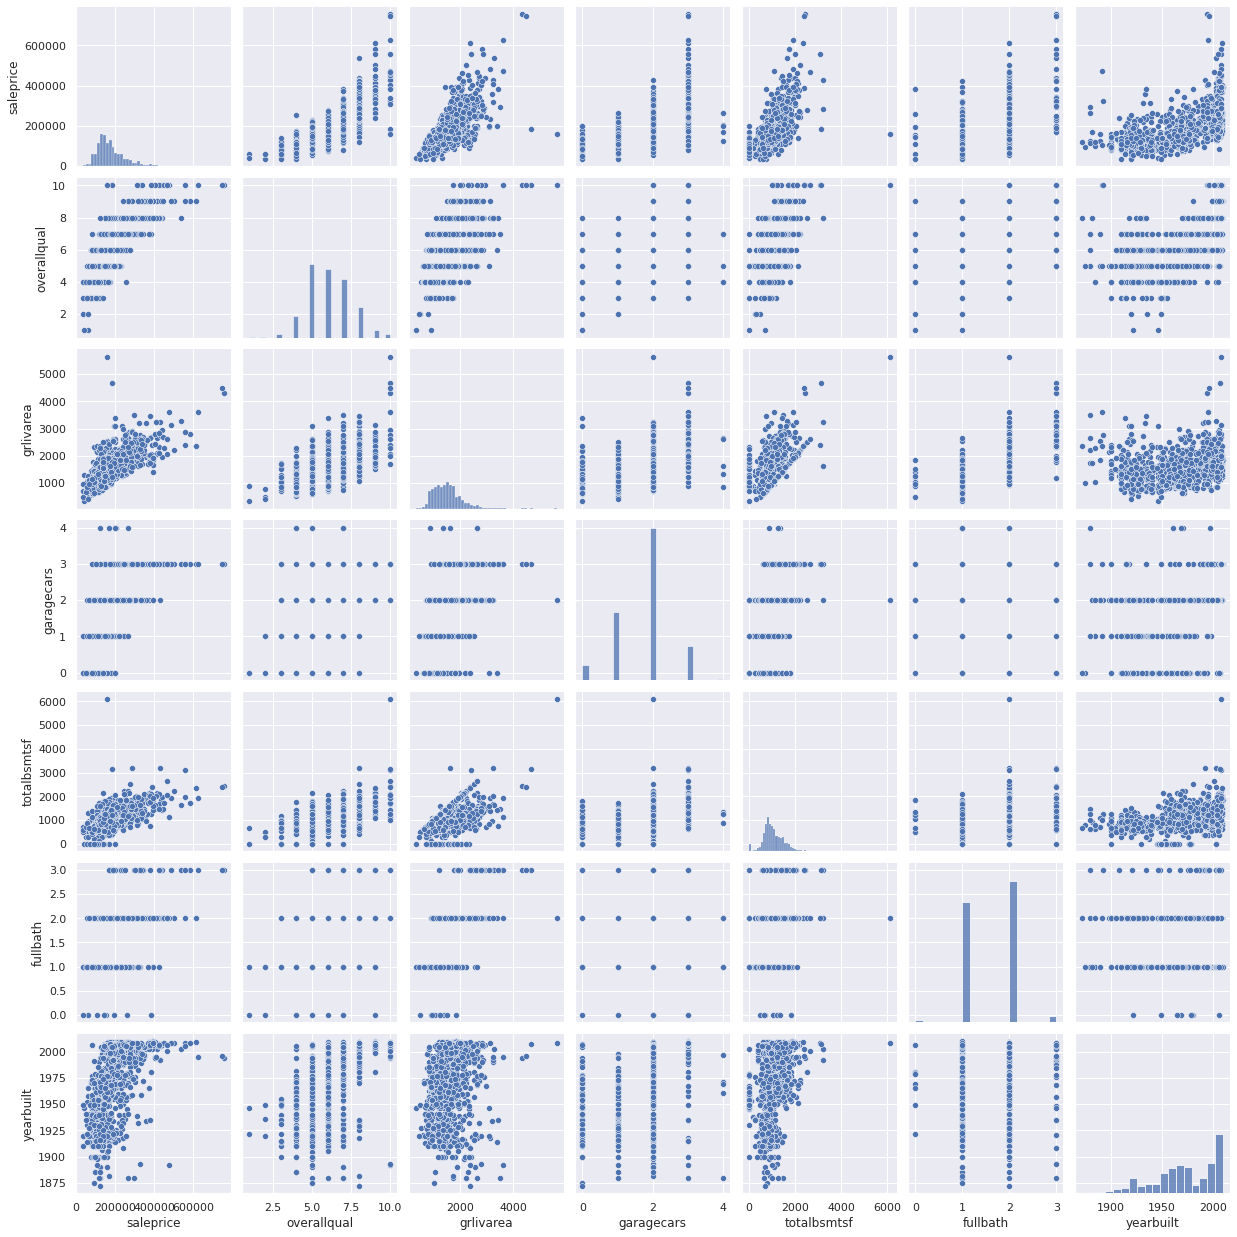

In [165]:
sns.set()
cols = ['saleprice', 'overallqual', 'grlivarea', 'garagecars','totalbsmtsf','fullbath','yearbuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()

#### Handling the Missing Values

In [166]:
data_train.isnull()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [167]:
data_train.isnull().sum()

id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
                ... 
mosold             0
yrsold             0
saletype           0
salecondition      0
saleprice          0
Length: 81, dtype: int64

In [168]:
data_train.dropna

<bound method DataFrame.dropna of         id  mssubclass mszoning  lotfrontage  lotarea street alley lotshape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     landcontour 

In [169]:
data_test.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1455,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [170]:
data_test.dropna

<bound method DataFrame.dropna of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour 

In [171]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [172]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [173]:
for x in data_train.columns:
    if data_train[x].dtypes == object:
        data_train[x]= data_train[x].fillna('None')
    else:
        data_train[x]= data_train[x].fillna(data_train[x].value_counts().idxmax())

In [174]:
for x in data_test.columns:
    if data_test[x].dtypes == object:
        data_test[x]= data_test[x].fillna('None')
    else:
        data_test[x]= data_test[x].fillna(data_test[x].value_counts().idxmax())

In [175]:
for x in data_train.columns:
    if data_train[x].dtypes == object:
        data_train[x]= label.fit_transform(data_train[x].astype(str)) 

In [176]:
y = data_train['saleprice']
data_train.drop(['saleprice'], axis=1, inplace=True)
X = data_train

In [177]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for x in data_test.columns:
    if data_test[x].dtypes == object:
        data_test[x]= label.fit_transform(data_test[x].astype(str))


## Splitting the Data 

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =42)

## Modelling

### Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)
score1 = model_1.score(x_test, y_test)
score1




0.003424657534246575

### Random Forest Regressor

In [222]:
from sklearn.metrics import mean_squared_error



In [216]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(x_train, y_train)
model_2.score(x_test, y_test)

0.8876244810420931

In [217]:
regressor = RandomForestRegressor(random_state=0)


In [218]:
tuned_Random_Forest = RandomForestRegressor(max_depth = 17, n_estimators= 500, random_state=0)

In [219]:
tuned_Random_Forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=17, n_estimators=500, random_state=0)

In [220]:
def rmse_check(model, X, y):
    pred_test = model.predict(x_test)
    mse = mean_squared_error(y_test, pred_test)
    print("RMSE: ", (mse**(1/2.0)))

In [221]:
rmse_check(tuned_Random_Forest, x_test, y_test)

RMSE:  29161.040442117574


## Gradient Boosting Regressor

In [225]:
from sklearn.ensemble import GradientBoostingRegressor

In [226]:
gb_tuned = GradientBoostingRegressor(n_estimators=100, random_state=0, max_depth=24)
gb_tuned.fit(x_train, y_train)
rmse_check(gb_tuned, x_test, y_test)

RMSE:  39823.67376193446


XGB Regressor

In [231]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
model = xgb.fit(x_train, y_train)
pred = rmse_check(xgb, x_test, y_test)

[18:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  27319.02874088024


Submission

In [232]:

pd.DataFrame({'Id':data_test.Id,'SalePrice': pred}).to_csv('submission.csv',index=False)